# Using Thingsboard API to print plots from sensor data

## Importing Libraries

In [8]:
import os

# import build-in datetime module
import datetime;

# import build-in json module
import json

# install and import requests module
%pip install requests
import requests

%pip install python-dotenv
from dotenv import load_dotenv
load_dotenv(override=True)

%pip install pandas
import pandas as pd

# install and import matplotlib
%pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Login / Authentication

In [9]:
# The credentials are used to authenticate the user / taken from .env file
credentials = {
    'username': os.environ["USERNAME"],
    'password': os.environ["PASSWORD"]
}

# The token authenticates the user to the server
token = requests.post('https://thingsboard.gruenecho.de/api/auth/login', json = credentials).json().get('token')
print(f'Token: {token}')

# Create header to be used in all requests
request_headers = {
    'Authorization': f'Bearer {token}'
}

Token: eyJhbGciOiJIUzUxMiJ9.eyJzdWIiOiJnZXJyaXQuYmFsaW5kdEBiLWxhY2suaW8iLCJ1c2VySWQiOiJjNmZiNTg3MC01N2RiLTExZWYtOGM4Yy1iNTY0ZmIzYWVhZTkiLCJzY29wZXMiOlsiVEVOQU5UX0FETUlOIl0sInNlc3Npb25JZCI6IjUxZWM3NTYwLWU4YWYtNGYyNS04NmEwLTZiMjcwNmQ4YjI4MiIsImV4cCI6MTcyNjY2MzQ0OCwiaXNzIjoidGhpbmdzYm9hcmQuaW8iLCJpYXQiOjE3MjY2NTQ0NDgsImZpcnN0TmFtZSI6IkdlcnJpdCIsImxhc3ROYW1lIjoiQmFsaW5kdCIsImVuYWJsZWQiOnRydWUsImlzUHVibGljIjpmYWxzZSwidGVuYW50SWQiOiIyZTNmOTJhMC01N2RhLTExZWYtOGM4Yy1iNTY0ZmIzYWVhZTkiLCJjdXN0b21lcklkIjoiMTM4MTQwMDAtMWRkMi0xMWIyLTgwODAtODA4MDgwODA4MDgwIn0.wMJcP0OwcrLiv7RYtTBCaChJQBvo0hlSAoalahJagjM76dlkbEfQZ49Q3_9uFLHVy30aJpoHBbyTFF93tAykwg


## Get device information

### Get available sensors at location (Natteheide Freifläche)

In [10]:
device_info = requests.get(f'https://thingsboard.gruenecho.de/api/plugins/telemetry/DEVICE/5b68c260-695a-11ef-a966-a56844bfea6c/keys/timeseries', headers=request_headers).json()
print(json.dumps(device_info, indent=2))

[
  "Datum",
  "CycleCounter",
  "L_Feuchte_min",
  "L_Feuchte_max",
  "L_Temp_min",
  "L_Temp_max",
  "UB",
  "L_Feuchte",
  "L_Temp",
  "G_Str",
  "Nied_unb",
  "ts",
  "G_Str_min",
  "G_Str_max",
  "W_Gesch_min",
  "W_Gesch_max",
  "W_Richt",
  "W_Gesch",
  "Nied_Pluvio",
  "B_Temp_min",
  "B_Temp_max",
  "L_Druck_min",
  "L_Druck_max",
  "B_Temp",
  "L_Druck"
]


### Get timeseries information at location (Natteheide Freifläche)

In [11]:
now = datetime.datetime.now()
one_year_ago = datetime.datetime.now() - datetime.timedelta(days=365)

params = {
    "keys": "B_Temp",
    "startTs": round(one_year_ago.timestamp() * 1000), 
    "endTs": round(now.timestamp() * 1000),
    "limit": 10000,
    "agg": "NONE",
    "interval": 0,
    "intervalType": "MILLISECONDS",
    "useStrictDataTypes": True,
}

data = requests.get(f'https://thingsboard.gruenecho.de/api/plugins/telemetry/DEVICE/5b68c260-695a-11ef-a966-a56844bfea6c/values/timeseries', headers=request_headers, params=params).json()
print(json.dumps(data, indent=2))

{
  "B_Temp": [
    {
      "ts": 1726455600000,
      "value": ""
    },
    {
      "ts": 1726452000000,
      "value": ""
    },
    {
      "ts": 1726448400000,
      "value": ""
    },
    {
      "ts": 1726444800000,
      "value": ""
    },
    {
      "ts": 1726441200000,
      "value": ""
    },
    {
      "ts": 1726437600000,
      "value": ""
    },
    {
      "ts": 1726434000000,
      "value": ""
    },
    {
      "ts": 1726430400000,
      "value": ""
    },
    {
      "ts": 1726426800000,
      "value": ""
    },
    {
      "ts": 1726423200000,
      "value": ""
    },
    {
      "ts": 1726419600000,
      "value": ""
    },
    {
      "ts": 1726416000000,
      "value": ""
    },
    {
      "ts": 1726412400000,
      "value": ""
    },
    {
      "ts": 1726408800000,
      "value": ""
    },
    {
      "ts": 1726405200000,
      "value": ""
    },
    {
      "ts": 1726401600000,
      "value": ""
    },
    {
      "ts": 1726398000000,
      "value": ""
    }

In [12]:
#Remove elements from data['B_Temp'] with no data or value is string
data['B_Temp'] = [x for x in data['B_Temp'] if x.get('value') and type(x.get('value')) in [int, float]]

## Plot Data

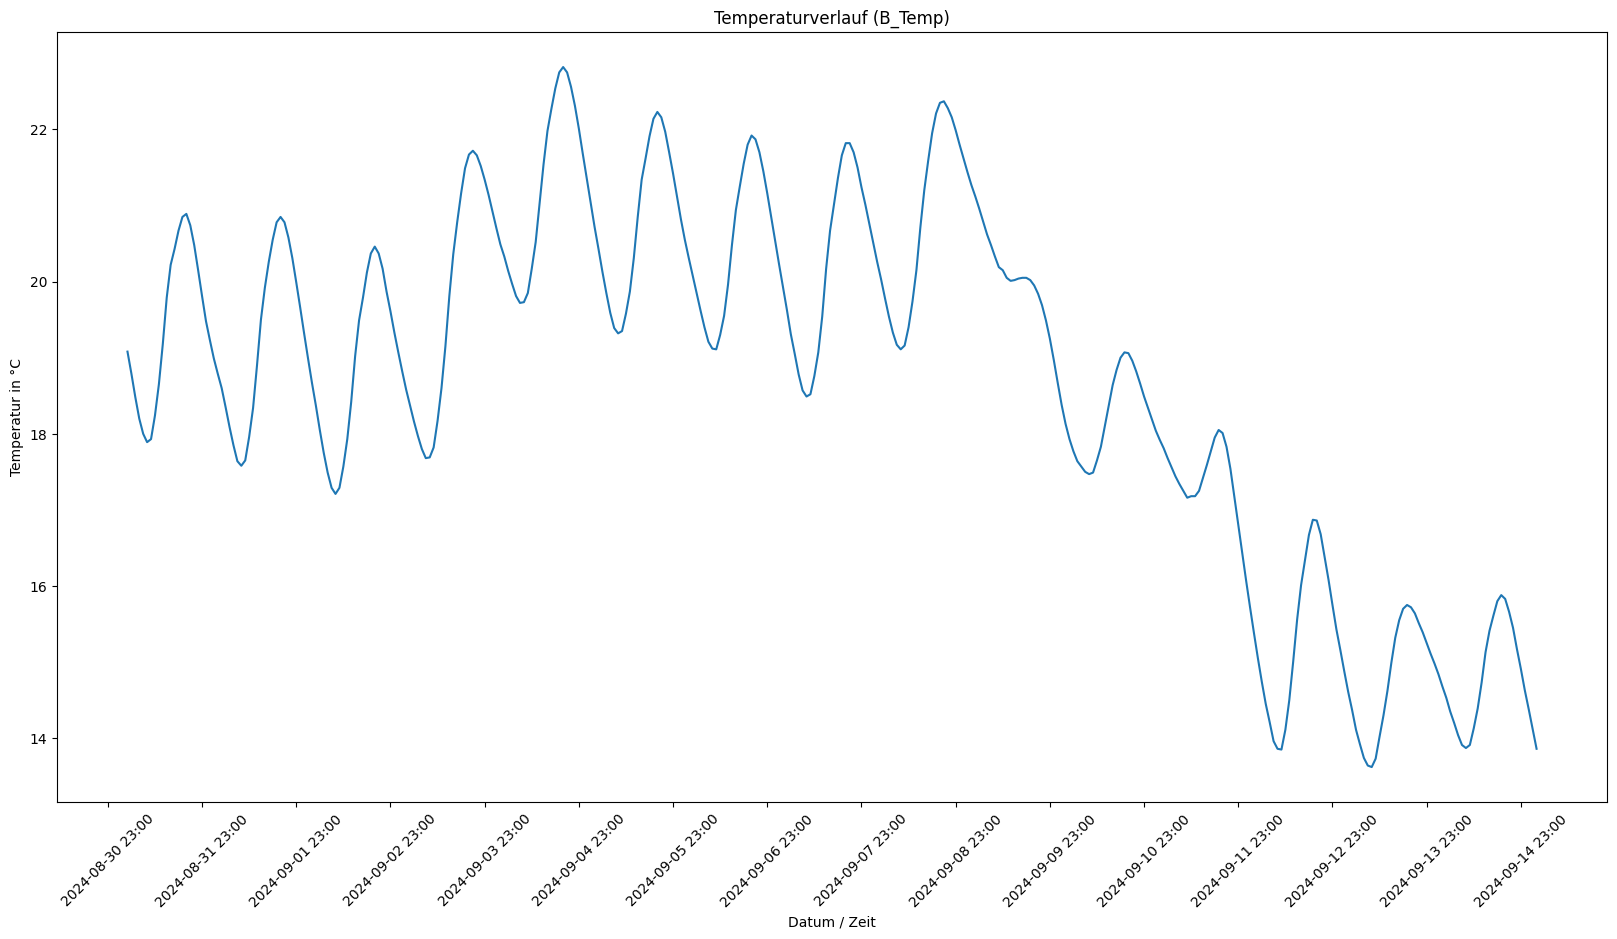

In [13]:
df = pd.DataFrame(data['B_Temp'])

# Assuming 'data' is already defined and contains the 'B_Temp' data
df = pd.DataFrame(data['B_Temp'])

# Convert the 'ts' column from milliseconds to datetime
df['ts'] = pd.to_datetime(df['ts'], unit='ms')

# Create the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the data
ax.plot(df['ts'], df['value'])

# Set labels and title
ax.set_xlabel("Datum / Zeit")
ax.set_ylabel("Temperatur in °C")
ax.set_title("Temperaturverlauf (B_Temp)")

# Set date format on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=24))  # Adjust the interval as needed

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()